In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

data = {
    'studyTime': np.random.randint(1, 10 , size=10), 
    'score' : np.random.randint(1, 10, size = 10)
}
df = pd.DataFrame(data)
df

,studyTime,score
0,7,7
1,7,6
2,4,4
3,8,7
4,9,8
5,1,4
6,1,9
7,7,8
8,9,6
9,4,5


In [4]:
# pedhazur formula
x_mean = np.mean(df['studyTime'])
y_mean = np.mean(df['score'])

# b1_pedha = np.sum((df['studyTime'] - x_mean) * (df['score'] - y_mean))/ np.sum((df['studyTime'] - x_mean) ** 2)
# b0_pedha = y_mean - b1_pedha*x_mean

b1_pedha = np.sum((df['studyTime'] - x_mean) * (df['score'] - y_mean)) / np.sum((df['studyTime'] - x_mean)**2)
b0_pedha = y_mean - b1_pedha*x_mean


print(b0_pedha, b1_pedha)

#calculus method
# design = np.vstack([np.ones(len(df['score'])) , df['studyTime']]).T
design = np.vstack([np.ones(len(df['score'])) , df['studyTime']]).T


b0_calculus, b1_calculus = np.linalg.inv(design.T @ design) @ design.T @ df['score']
print(b0_calculus, b1_calculus)

predictions = b0_calculus + b1_calculus*df['studyTime']
print(predictions)
print(df['score'])



5.483556638246042 0.1607795371498173
5.4835566382460375 0.1607795371498171
0    6.609013
1    6.609013
2    6.126675
3    6.769793
4    6.930572
5    5.644336
6    5.644336
7    6.609013
8    6.930572
9    6.126675
Name: studyTime, dtype: float64
0    7
1    6
2    4
3    7
4    8
5    4
6    9
7    8
8    6
9    5
Name: score, dtype: int32


[]

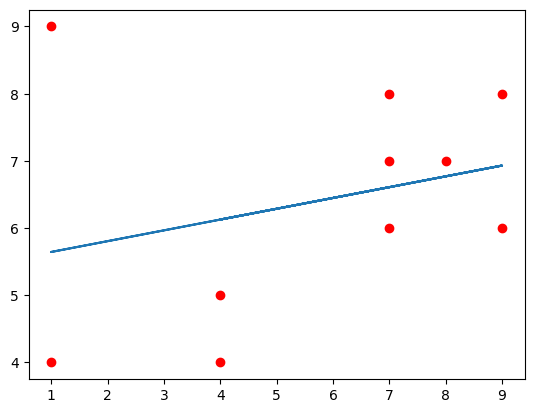

In [5]:
plt.plot(df['studyTime'], predictions)
plt.scatter(df['studyTime'], df['score'], color = 'red')
plt.plot()

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(df['studyTime']).reshape(-1,1)
y = np.array(df['score']).reshape(-1,1)
model.fit(x, y )
print("intercept: ",  model.intercept_, "slope: ", model.coef_)


intercept:  [5.48355664] slope:  [[0.16077954]]


In [11]:
#additional
df = pd.read_csv('./diabetes_csv.csv')
print(df.head)
df_drop = df.drop(columns = ['Age'])
print(df_drop.columns)


<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [17]:
df.columns[df.isna().any()].to_list()

[]